In [1]:
import pandas as pd
df = pd.read_csv('/root/autodl-tmp/xingmei/RecSys23/data/simplified_trn_val_tst_with_weekday.csv', sep='\t')

## Cat

In [41]:
cat = [f'f_{i}' for i in range(2, 33)] + ['f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 
                                          'f_50', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 
                                          'f_60', 'f_61', 'f_62', 'f_63',
                                          ] + [f'f_{i}' for i in range(71, 80)] 


cat.remove('f_7')
cat.remove('f_27')
cat.remove('f_28')
cat.remove('f_29')

In [42]:
trn_df = df[:3387880].copy()
val_df = df[3387880:-160973].copy()
tst_df = df[-160973:].copy()

In [43]:
for i in cat:
    trn_mode = trn_df[i].mode()
    trn_cat = trn_df[i].unique()
    val_df[i] = val_df[i].map(lambda x: x if x in trn_cat else trn_mode)
    tst_df[i] = tst_df[i].map(lambda x: x if x in trn_cat else trn_mode)

## Float

In [44]:
flo = [f'f_{i}' for i in range(42, 80)]
for i in cat:
    if i in flo:
        flo.remove(i)
flo

['f_42',
 'f_43',
 'f_51',
 'f_58',
 'f_59',
 'f_64',
 'f_65',
 'f_66',
 'f_67',
 'f_68',
 'f_69',
 'f_70']

In [45]:
from scipy import stats
for i in flo:
    print(i, stats.shapiro(df[i]), stats.kstest(df[i], 'norm', (df[i].mean(), df[i].std())), stats.normaltest(df[i]))

/root/autodl-tmp/xingmei/.conda/envs/recstudio/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


f_42 ShapiroResult(statistic=0.26223039627075195, pvalue=0.0) KstestResult(statistic=0.32885142469359113, pvalue=0.0, statistic_location=0.0, statistic_sign=-1) NormaltestResult(statistic=20269604.315362442, pvalue=0.0)
f_43 ShapiroResult(statistic=nan, pvalue=1.0) KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1) NormaltestResult(statistic=nan, pvalue=nan)
f_51 ShapiroResult(statistic=nan, pvalue=1.0) KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1) NormaltestResult(statistic=nan, pvalue=nan)
f_58 ShapiroResult(statistic=nan, pvalue=1.0) KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1) NormaltestResult(statistic=nan, pvalue=nan)
f_59 ShapiroResult(statistic=nan, pvalue=1.0) KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1) NormaltestResult(statistic=nan, pvalue=nan)
f_64 ShapiroResult(statistic=nan, pvalue=1.0) KstestResult(statistic=nan, pvalue=nan, st

In [46]:
for i in flo:
    print(i, df[i].min())

f_42 0.0
f_43 0.0
f_51 1.1664909153687513e-06
f_58 0.0
f_59 0.0
f_64 0.0
f_65 0.0
f_66 0.0
f_67 0.0
f_68 0.0
f_69 0.0
f_70 0.0


/root/autodl-tmp/xingmei/.conda/envs/recstudio/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


f_42 ShapiroResult(statistic=0.9707171320915222, pvalue=0.0) NormaltestResult(statistic=array([263074.80795866]), pvalue=array([0.]))


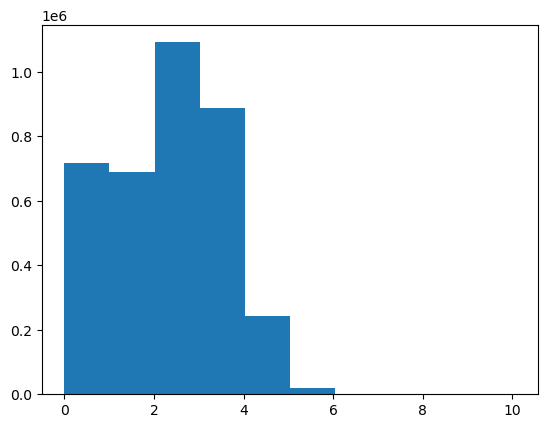

f_43 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


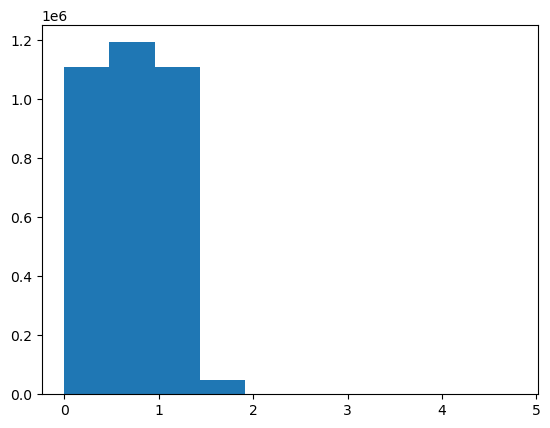

f_51 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


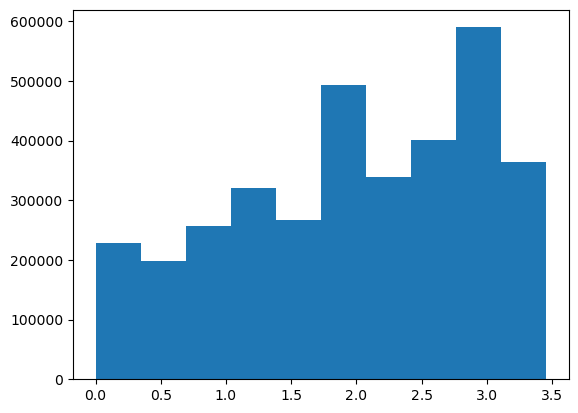

f_58 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


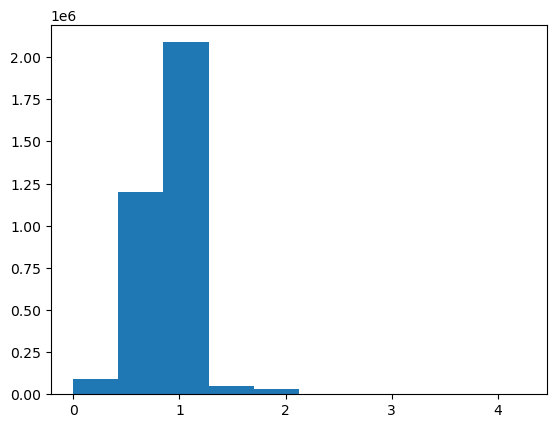

f_59 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


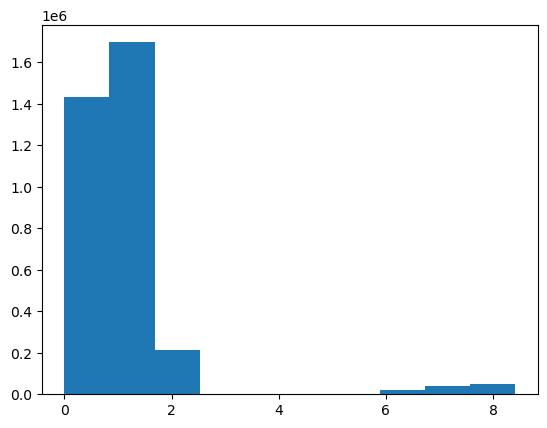

f_64 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


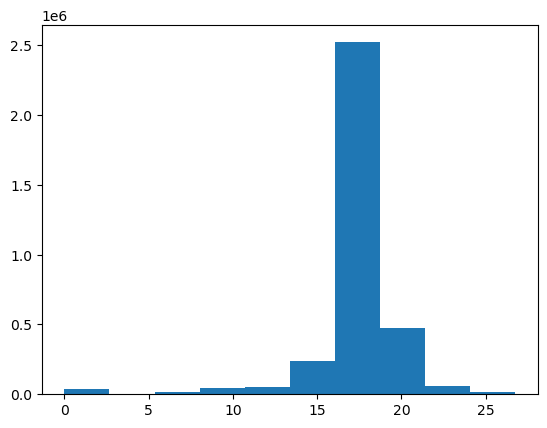

f_65 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


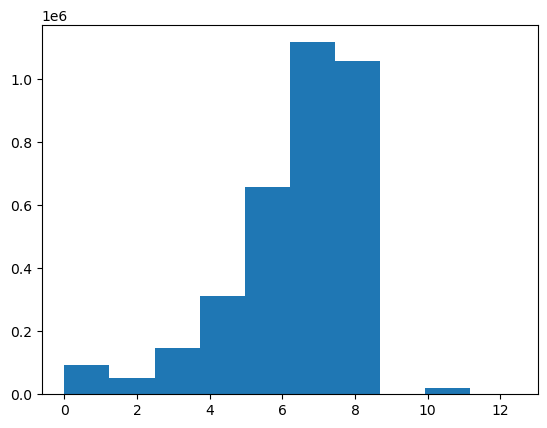

f_66 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


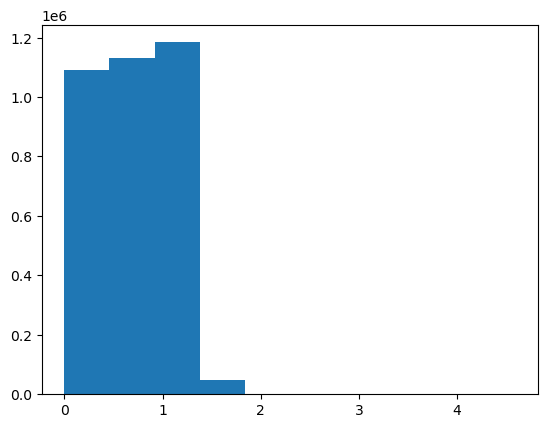

f_67 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


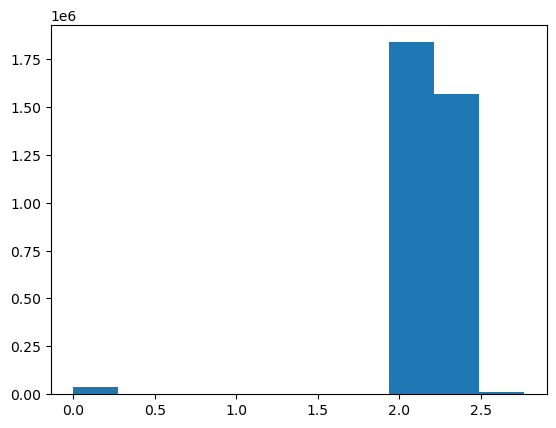

f_68 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


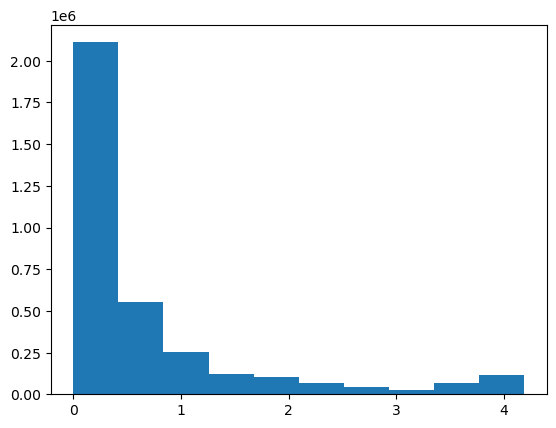

f_69 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


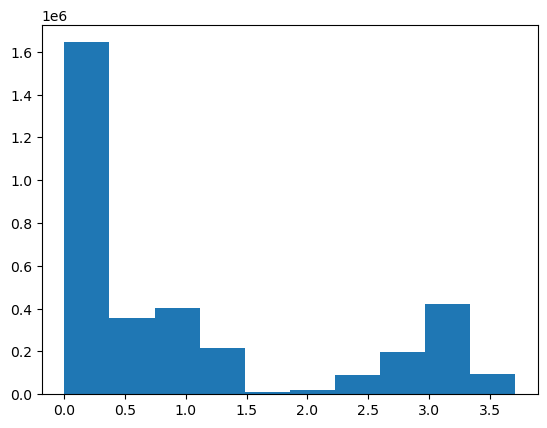

f_70 ShapiroResult(statistic=nan, pvalue=1.0) NormaltestResult(statistic=array([nan]), pvalue=array([nan]))


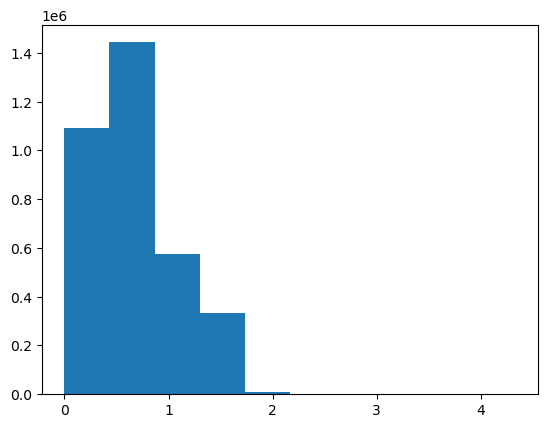

In [48]:
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import numpy as np

for i in flo:
    p = FunctionTransformer(np.log1p)
    data = p.fit_transform(df[i].to_numpy().reshape(-1, 1))
    print(i, stats.shapiro(data), stats.normaltest(data))
    plt.hist(data, bins=10, align='mid')
    plt.show()
    plt.close()

In [60]:
df[:3387880] = trn_df
df[3387880:-160973] = val_df
df[-160973:] = tst_df

In [62]:
for i in flo:
    df[i].fillna(value=df[i].mean(), inplace=True)

In [63]:
for i in flo:
    p = FunctionTransformer(np.log1p)
    df[i] = p.fit_transform(df[i].to_numpy().reshape(-1, 1))

## save

In [65]:
df.to_csv('/root/autodl-tmp/xingmei/RecSys23/data/all_log1p_tvt.csv', sep='\t', index=False)

In [67]:
cols = list(df.columns)
cols.remove('is_clicked')

In [68]:
df[cols].to_csv('/root/autodl-tmp/xingmei/RecSys23/data/all_log1p_tvt_install.csv', sep='\t', index=False)

In [69]:
for i in flo:
    print(i, df[i].min(), df[i].max())

f_42 0.0 10.064024178922027
f_43 0.0 4.77577714708745
f_51 1.1664902350187525e-06 3.4571408184394623
f_58 0.0 4.246715959558976
f_59 0.0 8.417276908188802
f_64 0.0 26.753246114210256
f_65 0.0 12.410549721085191
f_66 0.0 4.593266029805162
f_67 0.0 2.764652788857005
f_68 0.0 4.189182666607712
f_69 0.0 3.710529425580019
f_70 0.0 4.330167383529446
